In [22]:
import pandas as pd
import matplotlib.pyplot as plt 

data = pd.read_csv('./iris-data.csv')
data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])
data.tail()
data['class'].unique()

array([0, 1, 2])

In [25]:
data.corr()
# data.columns

,sepal-length,sepal-width,petal-length,petal-width,class
sepal-length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal-width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal-length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal-width,0.817954,-0.356544,0.962757,1.000000,0.956464
class,0.782561,-0.419446,0.949043,0.956464,1.000000


[]

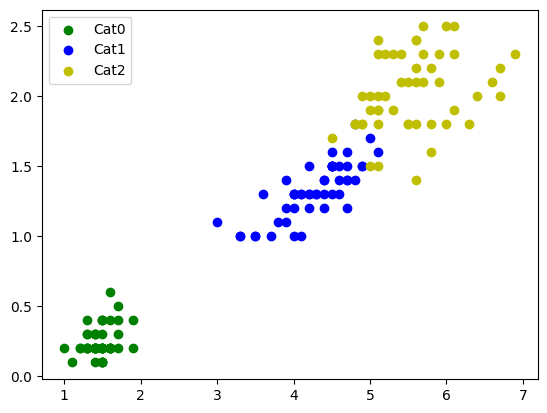

In [65]:
cat_0 = data[data['class']==0]
cat_1 = data[data['class']==1]
cat_2 = data[data['class']==2]
plt.scatter(cat_0['petal-length'],cat_0[' petal-width'],label='Cat0', c='g')
plt.scatter(cat_1['petal-length'],cat_1[' petal-width'],label='Cat1', c='b')
plt.scatter(cat_2['petal-length'],cat_2[' petal-width'],label='Cat2', c='y')
plt.legend()
plt.plot()
# plt.scatter?

In [31]:
x = data.iloc[:, :-1]
y = data['class']

In [33]:
from sklearn.model_selection import train_test_split
x_test, x_train, y_test, y_train = train_test_split(x, y, random_state=5, train_size=0.8)

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)#k = n_neighbors
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
result = pd.DataFrame({'actual': y_test, 'Predicted': y_pred})
result

,actual,Predicted
39,0,0
53,1,1
79,1,1
10,0,0
50,1,1
...,...,...
8,0,0
73,1,1
144,2,2
118,2,2


In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.95

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cm

array([[42,  0,  0],
       [ 0, 36,  3],
       [ 0,  3, 36]], dtype=int64)

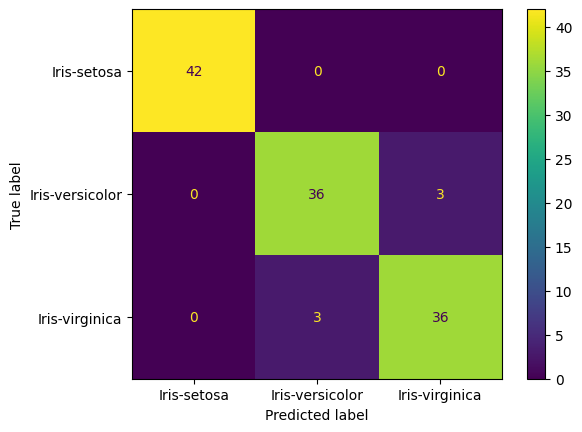

In [62]:
cm_disp = ConfusionMatrixDisplay(cm, display_labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
cm_disp.plot()

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.92      0.92      0.92        39
           2       0.92      0.92      0.92        39

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120

